<a href="https://colab.research.google.com/github/silviaalvinia/dataset/blob/master/%5BII4042%5D_18316018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

## Automobile Dataset

### Descriptive Data Analysis

In [0]:
import pandas as pd
import numpy as np

#df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)
#df = pd.read_csv(r'C:\Users\User\Google Drive\tjieh\kuliah smt7\business ai\ipynb\BusinessRules.csv', header = 0)
#df = pd.read_csv('https://raw.githubusercontent.com/silviaalvinia/dataset/master/BusinessRules.csv', header = 0)
df = pd.read_csv('https://raw.githubusercontent.com/silviaalvinia/dataset/master/DataCoSupplyChainDataset10k.csv', header = 0)


In [0]:
df.shape

(10520, 53)

In [0]:
df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [0]:
df.tail(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
10517,TRANSFER,3,4,44.790001,159.960007,Advance shipping,0,29,Shop By Sport,Aurora,EE. UU.,XXXXXXXXX,Mary,4860,Wiggins,XXXXXXXXX,Corporate,CO,5180 Bright Fox Trail,80010,5,Golf,39.745434,-104.875381,LATAM,Buenos Aires,Argentina,4860,5/29/2017 9:06,60242,627,39.990002,0.20,150721,39.990002,0.28,5,199.949997,159.960007,44.790001,South America,Buenos Aires,PENDING,NaN,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,6/1/2017 9:06,Standard Class
10518,TRANSFER,6,4,-119.970001,149.960007,Late delivery,1,29,Shop By Sport,El Paso,EE. UU.,XXXXXXXXX,Mary,1937,Werner,XXXXXXXXX,Corporate,TX,5731 Sleepy Apple Autoroute,79936,5,Golf,31.771334,-106.419922,LATAM,Tlalnepantla,México,1937,1/5/2015 7:00,295,627,49.990002,0.25,744,39.990002,-0.80,5,199.949997,149.960007,-119.970001,Central America,México,PENDING,NaN,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,1/11/2015 7:00,Standard Class
10519,TRANSFER,4,4,91.879997,187.500000,Shipping on time,0,24,Women's Apparel,Pasadena,EE. UU.,XXXXXXXXX,Mary,9898,Moon,XXXXXXXXX,Corporate,MD,2488 Dusty By-pass,21122,5,Golf,39.128670,-76.546768,LATAM,Tegucigalpa,Honduras,9898,2/22/2015 1:40,3568,502,62.500000,0.25,8878,50.000000,0.49,5,250.000000,187.500000,91.879997,Central America,Francisco Morazán,PENDING,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,2/26/2015 1:40,Standard Class


In [0]:
df.sample(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
8095,CASH,2,4,27.290001,136.440002,Advance shipping,0,67,DVDs,Caguas,Puerto Rico,XXXXXXXXX,Florence,15074,Faulkner,XXXXXXXXX,Corporate,PR,7334 Merry Maze,725,9,Discs Shop,18.279737,-66.037064,Europe,Eindhoven,Países Bajos,15074,11/10/2017 0:38,71521,1354,27.940001,0.17,174836,164.380005,0.20,1,164.380005,136.440002,27.290001,Western Europe,Brabante Septentrional,CLOSED,NaN,1354,67,NaN,http://images.acmesports.sports/DVDs,DVDs,164.380005,0,11/12/2017 0:38,Standard Class
3264,PAYMENT,6,4,53.040001,110.489998,Late delivery,1,18,Men's Footwear,Caguas,Puerto Rico,XXXXXXXXX,Anthony,10451,Soto,XXXXXXXXX,Home Office,PR,937 Golden Carrefour,725,4,Apparel,18.254194,-66.370628,Pacific Asia,Bekasi,Indonesia,10451,1/14/2016 5:04,25910,403,19.500000,0.15,64856,129.990005,0.48,1,129.990005,110.489998,53.040001,Southeast Asia,Java Occidental,PENDING_PAYMENT,NaN,403,18,NaN,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,1/20/2016 5:04,Standard Class
6038,CASH,2,1,46.740002,245.979996,Late delivery,1,43,Camping & Hiking,New Orleans,EE. UU.,XXXXXXXXX,Theresa,8273,Lopez,XXXXXXXXX,Consumer,LA,3281 Honey Woods,70122,7,Fan Shop,30.006823,-90.061394,Pacific Asia,Fatehpur,India,8273,11/27/2015 12:09,22642,957,54.000000,0.18,56653,299.980011,0.19,1,299.980011,245.979996,46.740002,South Asia,Rajastán,CLOSED,NaN,957,43,NaN,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,11/29/2015 12:09,First Class


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 53 columns):
Type                             10520 non-null object
Days for shipping (real)         10520 non-null int64
Days for shipment (scheduled)    10520 non-null int64
Benefit per order                10520 non-null float64
Sales per customer               10520 non-null float64
Delivery Status                  10520 non-null object
Late_delivery_risk               10520 non-null int64
Category Id                      10520 non-null int64
Category Name                    10520 non-null object
Customer City                    10520 non-null object
Customer Country                 10520 non-null object
Customer Email                   10520 non-null object
Customer Fname                   10520 non-null object
Customer Id                      10520 non-null int64
Customer Lname                   10520 non-null object
Customer Password                10520 non-null object
Customer Segme

In [0]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,1343.000000,10520.000000,10520.000000,0.0,10520.000000,10520.0
mean,3.725000,3.221958,21.592510,180.721454,0.526521,26.089068,7096.973479,32989.557414,4.540399,28.719356,-83.458676,7096.973479,36051.777567,552.344392,20.853613,0.103355,89554.619011,116.906122,0.120445,2.540970,201.574798,180.721454,21.592510,55720.125838,552.344392,26.089068,NaN,116.906122,0.0
std,1.513241,1.178552,106.530462,117.154447,0.499320,16.741844,4578.974291,37413.102920,1.612258,9.865977,21.608807,4578.974291,21507.832099,336.556953,22.038774,0.070481,52777.623393,126.527064,0.460913,1.579179,130.209593,117.154447,106.530462,31610.324856,336.556953,16.741844,NaN,126.527064,0.0
min,0.000000,0.000000,-3366.000000,8.470000,0.000000,2.000000,1.000000,603.000000,2.000000,17.982491,-158.025986,1.000000,12.000000,24.000000,0.000000,0.000000,35.000000,11.290000,-2.750000,1.000000,11.290000,8.470000,-3366.000000,1453.000000,24.000000,2.000000,NaN,11.290000,0.0
25%,2.000000,2.000000,6.702500,99.580002,0.000000,17.000000,3433.000000,725.000000,4.000000,18.256513,-97.332850,3433.000000,18154.000000,365.000000,5.500000,0.040000,45371.750000,50.000000,0.080000,1.000000,119.970001,99.580002,6.702500,27604.000000,365.000000,17.000000,NaN,50.000000,0.0
50%,4.000000,4.000000,30.385000,155.160004,1.000000,24.000000,6746.000000,11218.500000,4.000000,31.768230,-74.159920,6746.000000,33850.000000,403.000000,14.400000,0.100000,84502.000000,59.990002,0.270000,2.000000,179.970001,155.160004,30.385000,60610.000000,403.000000,24.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.760000,251.960007,1.000000,29.000000,10091.000000,76010.000000,5.000000,38.583420,-66.370567,10091.000000,53711.000000,627.000000,29.990000,0.160000,134269.500000,129.990005,0.360000,4.000000,299.950012,251.960007,64.760000,90008.000000,627.000000,29.000000,NaN,129.990005,0.0
max,6.000000,4.000000,614.250000,1470.000000,1.000000,76.000000,20755.000000,98632.000000,12.000000,48.781933,115.049789,20755.000000,77202.000000,1363.000000,375.000000,0.250000,180517.000000,1500.000000,0.500000,5.000000,1500.000000,1470.000000,614.250000,99301.000000,1363.000000,76.000000,NaN,1500.000000,0.0


In [0]:
df['Order Item Profit Ratio'].value_counts()

 0.48    515
 0.35    495
 0.26    416
 0.34    378
 0.47    359
        ... 
-2.20      1
-0.02      1
-0.93      1
-1.37      1
-0.85      1
Name: Order Item Profit Ratio, Length: 157, dtype: int64

In [27]:
df[df.columns[3]].name

'Benefit per order'

In [29]:
# identify outliers
for i in range(len(df.columns)):
    if (df[df.columns[i]].dtypes in ['int64','float64']):
        print('\nAttribute -',i, ' - ', df[df.columns[i]].name,':',df[df.columns[i]].dtypes)
        Q1=df[df.columns[i]].quantile(0.25)
        print('Q1',Q1)
        Q3=df[df.columns[i]].quantile(0.75)
        print('Q3',Q3)
        IQR=Q3-Q1
        print('IQR',IQR)
        min=df[df.columns[i]].min()
        max=df[df.columns[i]].max()
        min_IQR=Q1-1.5*IQR
        max_IQR=Q3+1.5*IQR
        if (min<min_IQR):
            print('Low outlier is found')
        if (max>max_IQR):
            print('High outlier is found')


Attribute - 1  -  Days for shipping (real) : int64
Q1 2.0
Q3 5.0
IQR 3.0

Attribute - 2  -  Days for shipment (scheduled) : int64
Q1 2.0
Q3 4.0
IQR 2.0

Attribute - 3  -  Benefit per order : float64
Q1 6.702499985499999
Q3 64.76000023
IQR 58.057500244500005
Low outlier is found
High outlier is found

Attribute - 4  -  Sales per customer : float64
Q1 99.58000183
Q3 251.96000669999998
IQR 152.38000487
High outlier is found

Attribute - 6  -  Late_delivery_risk : int64
Q1 0.0
Q3 1.0
IQR 1.0

Attribute - 7  -  Category Id : int64
Q1 17.0
Q3 29.0
IQR 12.0
High outlier is found

Attribute - 13  -  Customer Id : int64
Q1 3433.0
Q3 10091.0
IQR 6658.0
High outlier is found

Attribute - 19  -  Customer Zipcode : int64
Q1 725.0
Q3 76010.0
IQR 75285.0

Attribute - 20  -  Department Id : int64
Q1 4.0
Q3 5.0
IQR 1.0
Low outlier is found
High outlier is found

Attribute - 22  -  Latitude : float64
Q1 18.2565131225
Q3 38.5834197975
IQR 20.326906675

Attribute - 23  -  Longitude : float64
Q1 -97.33284

In [0]:
df.isna().describe()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
count,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
freq,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,9177,10520,10520,10520,10520,10520,10520,10520,10520,10520


In [51]:
df['Order Zipcode'].isna().value_counts()

True     9177
False    1343
Name: Order Zipcode, dtype: int64

In [56]:
df['Order Zipcode'] = df['Order Zipcode'].fillna('0')
df['Order Zipcode'].isna().value_counts()

False    10520
Name: Order Zipcode, dtype: int64

In [57]:
df['Order Zipcode'].value_counts()

0          9177
10035.0      44
94110.0      36
90045.0      26
19134.0      26
           ... 
48126.0       1
72701.0       1
17403.0       1
46060.0       1
43017.0       1
Name: Order Zipcode, Length: 320, dtype: int64

In [58]:
df.isna().describe()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
count,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
freq,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520,10520


### Exploratory Data Analysis

In [0]:
df['Order Item Profit Ratio'].describe()

count    10520.000000
mean         0.120445
std          0.460913
min         -2.750000
25%          0.080000
50%          0.270000
75%          0.360000
max          0.500000
Name: Order Item Profit Ratio, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

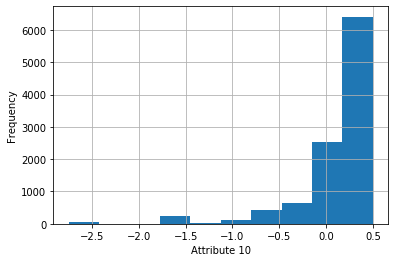

In [0]:
import matplotlib
df['Order Item Profit Ratio'].hist().set(xlabel='Attribute 10',ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

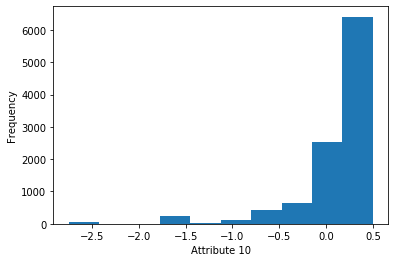

In [0]:
df['Order Item Profit Ratio'].hist(grid=False).set(xlabel='Attribute 10', ylabel='Frequency')

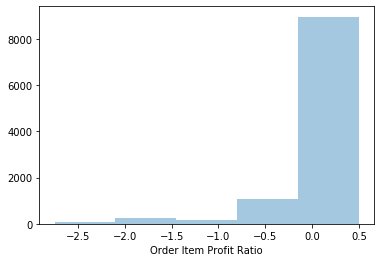

In [0]:
import seaborn as sns
sns.distplot(df['Order Item Profit Ratio'], kde=False, bins=5)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

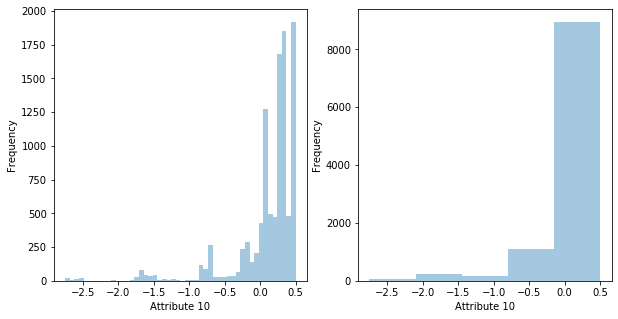

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True)
sns.distplot(df['Order Item Profit Ratio'], kde=False, ax=axes[0]).set(xlabel='Attribute 10', ylabel='Frequency')
sns.distplot(df['Order Item Profit Ratio'], kde=False, bins=5, ax=axes[1]).set(xlabel='Attribute 10', ylabel='Frequency')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Attribute 10')]

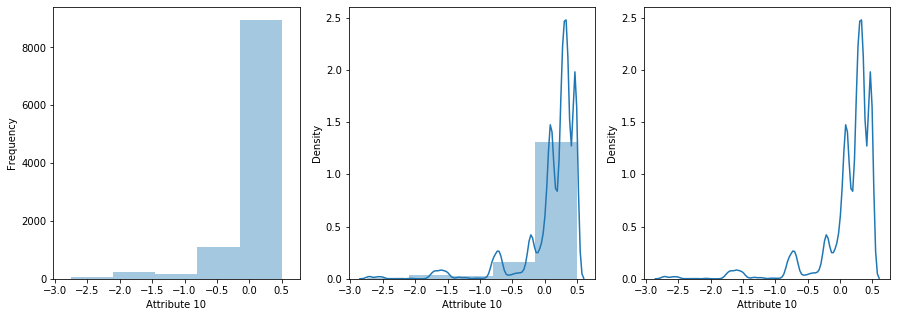

In [0]:
f, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True)
sns.distplot(df['Order Item Profit Ratio'], kde=False, bins=5, ax=axes[0]).set(xlabel='Attribute 10', ylabel='Frequency')
sns.distplot(df['Order Item Profit Ratio'], bins=5, ax=axes[1]).set(xlabel='Attribute 10', ylabel='Density')
sns.distplot(df['Order Item Profit Ratio'], bins=5, hist=False, ax=axes[2]).set(xlabel='Attribute 10', ylabel='Density')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 6')]

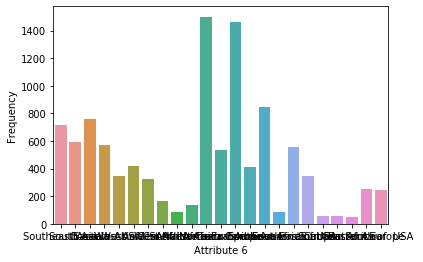

In [0]:
sns.countplot(df['Order Region']).set(xlabel='Attribute 6', ylabel='Frequency')

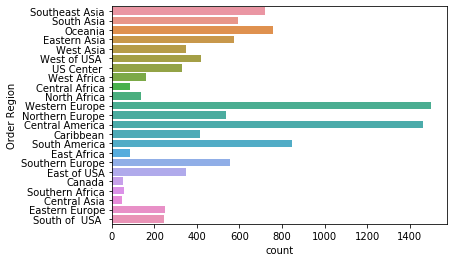

In [0]:
sns.countplot(y=df['Order Region'])

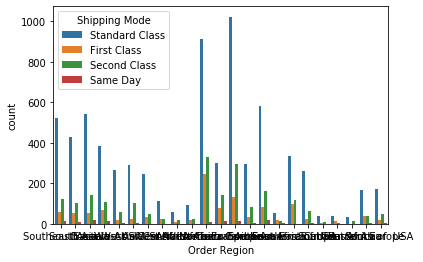

In [0]:
sns.countplot(x=df['Order Region'],hue=df['Shipping Mode'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


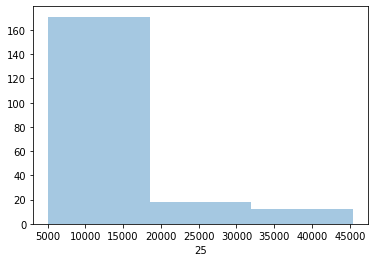

In [0]:
#exercise 4
missing_values = ["?"]
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None, na_values = missing_values)
#df[25].dropna().describe()
sns.distplot(df[25], kde=False, bins=3)

Text(0.5, 1.0, 'basic plot')

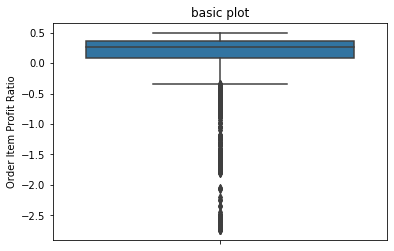

In [0]:
sns.boxplot(y=df['Order Item Profit Ratio']).set_title('basic plot')


Text(0.5, 1.0, 'horizontal')

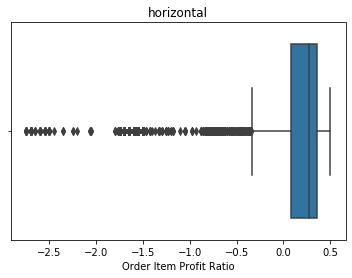

In [0]:
sns.boxplot(x=df['Order Item Profit Ratio']).set_title('horizontal')


Text(0.5, 1.0, 'notched plot')

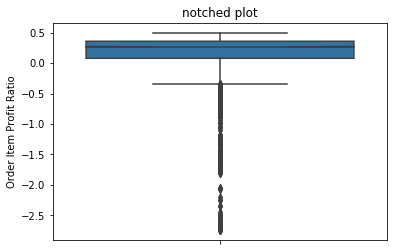

In [0]:
sns.boxplot(y=df['Order Item Profit Ratio'],notch=True).set_title('notched plot')

Text(0.5, 1.0, 'basic plot')

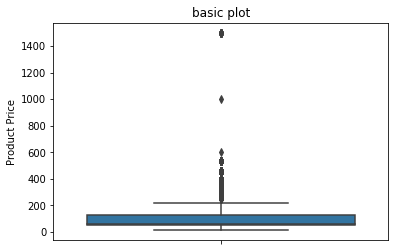

In [0]:
sns.boxplot(y=df['Product Price']).set_title('basic plot')

Text(0.5, 1.0, 'group by late delivery risk')

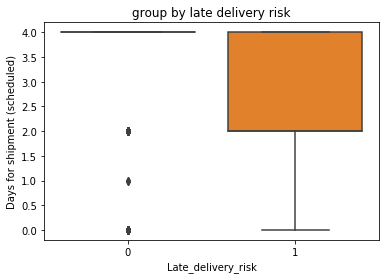

In [0]:
sns.boxplot(y=df['Days for shipment (scheduled)'], x=df['Late_delivery_risk']).set_title('group by late delivery risk')

Text(0.5, 1.0, 'grouped by fuel-type & aspiration')

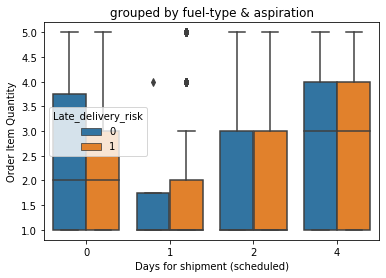

In [0]:
sns.boxplot(hue=df['Late_delivery_risk'], y=df['Order Item Quantity'], x=df['Days for shipment (scheduled)']).set_title('grouped by fuel-type & aspiration')


Text(0.5, 1.0, 'group by drive-wheels')

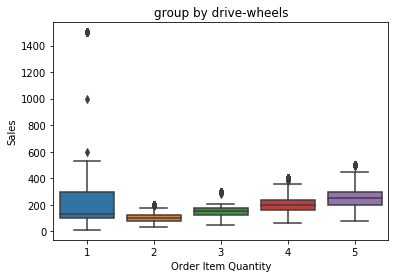

In [0]:
#exercise 5
sns.boxplot(y=df['Sales'], x=df['Order Item Quantity']).set_title('group by drive-wheels')


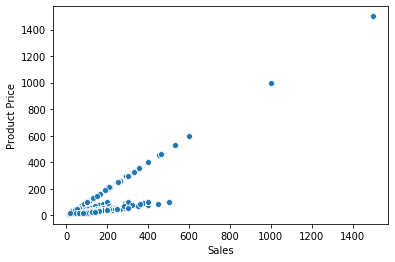

In [0]:
#missing_values = ["?"]
#df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None, na_values = missing_values)
#df_price=df[df[25]!='?'][25].astype("int64") 
df_price=df['Product Price'].dropna().astype("int64")
sns.scatterplot(x=df['Sales'],y=df_price) #.set(xlabel='Attribute 16', ylabel='Attribute 25')

In [0]:
df_price_engine=df.iloc[:,[16,25]]
#df_price_engine=df_price_engine[df_price_engine[25]!='?']
#df_price_engine[25]=df_price_engine[25].astype("int64")
df_price_engine[25]=df_price_engine[25].dropna().astype("int64")
df_price_engine.corr()

KeyError: ignored

### heatmap

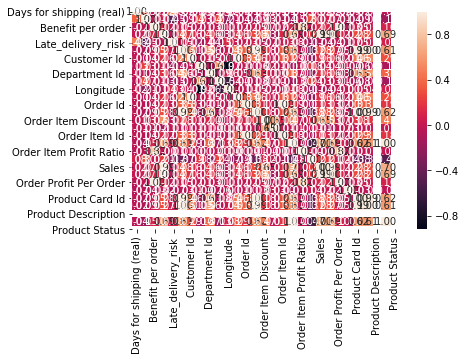

In [0]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

In [0]:
sns.heatmap(df_pivot, annot=True, fmt='.2f').set(xlabel='Attribute 6', ylabel='Attribute 7')

NameError: ignored

In [0]:
#select body-style(6), drive-wheels(7), price(25) from df
df_3features=df[df.columns[np.r_[6:8,25]]]
#select data where price is not null
df_3features=df_3features[df_3features[25]!='?']
#convert price attribute in object type into float
df_3features[25] = df_3features[25].astype("float64")
#group by body-style(6), drive-wheels(7)
df_grp=df_3features.groupby([df.columns[6],df.columns[7]]).mean()
#create pivot table
df_pivot=df_grp.pivot_table(index=df.columns[7],columns=df.columns[6])


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


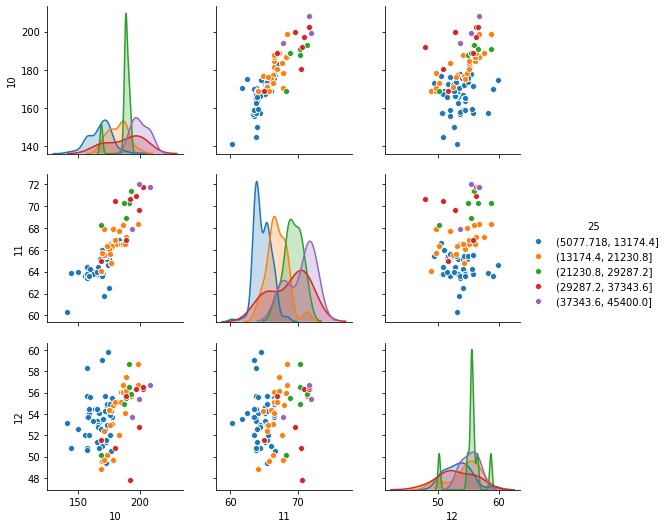

In [0]:
#select length(10),width(11),height(12),price(25) from df
df_4features=df[df.columns[np.r_[10:13,25]]]
#convert price attr. in object type into float
df_4features=df_4features[df_4features[25]!='?']
df_4features[25] = df_4features[25].astype("float64")
df_4features[25] = pd.cut(df_4features[25], 5)
df_4features[25] = df_4features[25].astype("category")
sns.pairplot(data=df_4features,hue=df.columns[25])

## Wine Quality Dataset

In [0]:
import pandas as pd

dg = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', header=0, sep=';')
dg.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [0]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [0]:
dg['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [0]:
dg.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000
